# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('911.csv')

In [3]:
sns.set_style('darkgrid')
sns.set_context('poster', font_scale=1)

In [4]:
df.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:40:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 17:40:00         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY  2015-12-10 17:40:01         NORRISTOWN   
4      NaN           EMS: DIZZINESS  2015-12-10 17:40:01   LOWER POTTSGROVE   

                         addr  e  
0      REINDEER CT & DEAD END  1  
1  BRIAR PATH & WHITEMARSH LN  1  
2                    HAWS AVE  1  
3          AIRY ST & SWEDE ST  1  
4    CHERRYWOOD CT & DEAD END  1

**Check the info() of the df**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


**What are the top 5 zipcodes for 911 calls?**

In [6]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

**What are the top 5 townships (twp) for 911 calls?**

In [7]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

**Take a look at the 'title' column, how many unique title codes are there?**

In [8]:
len(df['title'].unique())

110

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.**

In [9]:
df.head(3)

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:40:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 17:40:00         NORRISTOWN   

                         addr  e  
0      REINDEER CT & DEAD END  1  
1  BRIAR PATH & WHITEMARSH LN  1  
2                    HAWS AVE  1

In [10]:
df['Reason'] = df['title'].apply(lambda x: 'EMS' if 'ems' in x.lower().split(':') else ('Fire' if 'fire' in x.lower().split(':') else 'Traffic' ))

In [11]:
df.head(10)

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   
5  40.253473 -75.283245  CANNON AVE & W 9TH ST;  LANSDALE; Station 345;...   
6  40.182111 -75.127795  LAUREL AVE & OAKDALE AVE;  HORSHAM; Station 35...   
7  40.217286 -75.405182  COLLEGEVILLE RD & LYWISKI RD;  SKIPPACK; Stati...   
8  40.289027 -75.399590  MAIN ST & OLD SUMNEYTOWN PIKE;  LOWER SALFORD;...   
9  40.102398 -75.291458  BLUEROUTE  & RAMP I476 NB TO CHEMICAL RD; PLYM...   

       zip                        title            timeStamp  \
0  19525.0       EMS: BACK PAINS/INJURY  2015-12-10 17:40:00   
1  19446.0      EMS: DIABETIC EMERGENCY  2015-12-10 17:40:00   
2  19401.0          Fire: GAS-ODOR/LEAK  2015-12-10 17:40:00   
3  19401.0       EMS: CARDIAC EMERGENCY  2015-12-10 17:40:01   
4      NaN               EMS: DIZZINESS  2015-12-10 17:40:01   
5  19446.0             EMS: HEAD INJURY  2015-12-10 17:40:01   
6  19044.0         EMS: NAUSEA/VOMITING  2015-12-10 17:40:01   
7  19426.0   EMS: RESPIRATORY EMERGENCY  2015-12-10 17:40:01   
8  19438.0        EMS: SYNCOPAL EPISODE  2015-12-10 17:40:01   
9  19462.0  Traffic: VEHICLE ACCIDENT -  2015-12-10 17:40:01   

                 twp                                      addr  e   Reason  
0        NEW HANOVER                    REINDEER CT & DEAD END  1      EMS  
1  HATFIELD TOWNSHIP                BRIAR PATH & WHITEMARSH LN  1      EMS  
2         NORRISTOWN                                  HAWS AVE  1     Fire  
3         NORRISTOWN                        AIRY ST & SWEDE ST  1      EMS  
4   LOWER POTTSGROVE                  CHERRYWOOD CT & DEAD END  1      EMS  
5           LANSDALE                     CANNON AVE & W 9TH ST  1      EMS  
6            HORSHAM                  LAUREL AVE & OAKDALE AVE  1      EMS  
7           SKIPPACK              COLLEGEVILLE RD & LYWISKI RD  1      EMS  
8      LOWER SALFORD             MAIN ST & OLD SUMNEYTOWN PIKE  1      EMS  
9           PLYMOUTH  BLUEROUTE  & RAMP I476 NB TO CHEMICAL RD  1  Traffic

**What is the most common Reason for a 911 call based off of this new column?**

In [12]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

**Now use seaborn to create a countplot of 911 calls by Reason.**

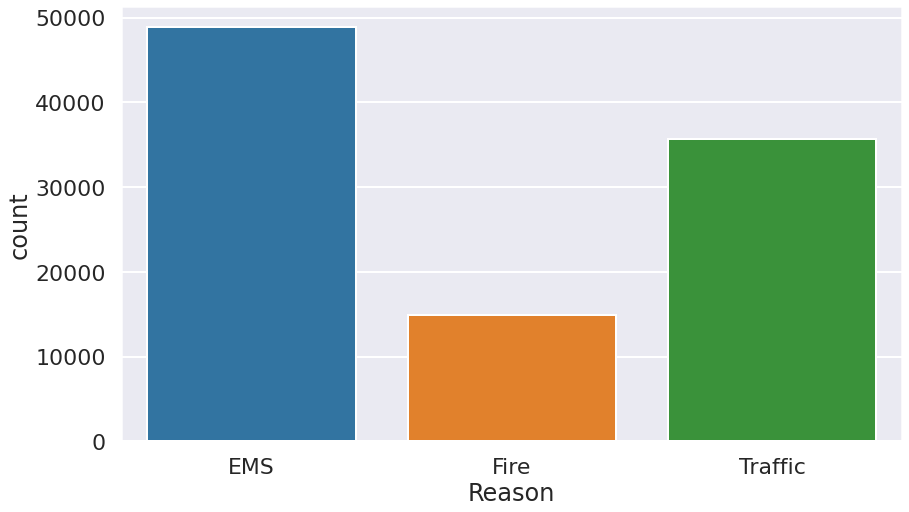

In [13]:
fig = plt.figure(figsize=(14,8))
sns.countplot(x='Reason', data=df)
plt.xlabel('Reason')
plt.show()

**Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column?**

In [14]:
type(df['timeStamp'][0])

str

**You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects.**

In [15]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [16]:
type(df['timeStamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

** You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [17]:
df['timeStamp'].head(2)

0   2015-12-10 17:40:00
1   2015-12-10 17:40:00
Name: timeStamp, dtype: datetime64[ns]

In [18]:
df['timeStamp'].iloc[0].hour

17

In [19]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)

In [20]:
df['timeStamp'].iloc[0].month

12

In [21]:
df['Month'] = df['timeStamp'].apply(lambda x:x.month)

In [22]:
df['timeStamp'].iloc[0].day_name()

'Thursday'

In [23]:
df['Day of Week'] = df['timeStamp'].apply(lambda x:x.day_name())

In [24]:
df.head(2)

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   

       zip                    title           timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY 2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY 2015-12-10 17:40:00  HATFIELD TOWNSHIP   

                         addr  e Reason  Hour  Month Day of Week  
0      REINDEER CT & DEAD END  1    EMS    17     12    Thursday  
1  BRIAR PATH & WHITEMARSH LN  1    EMS    17     12    Thursday

**Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.**

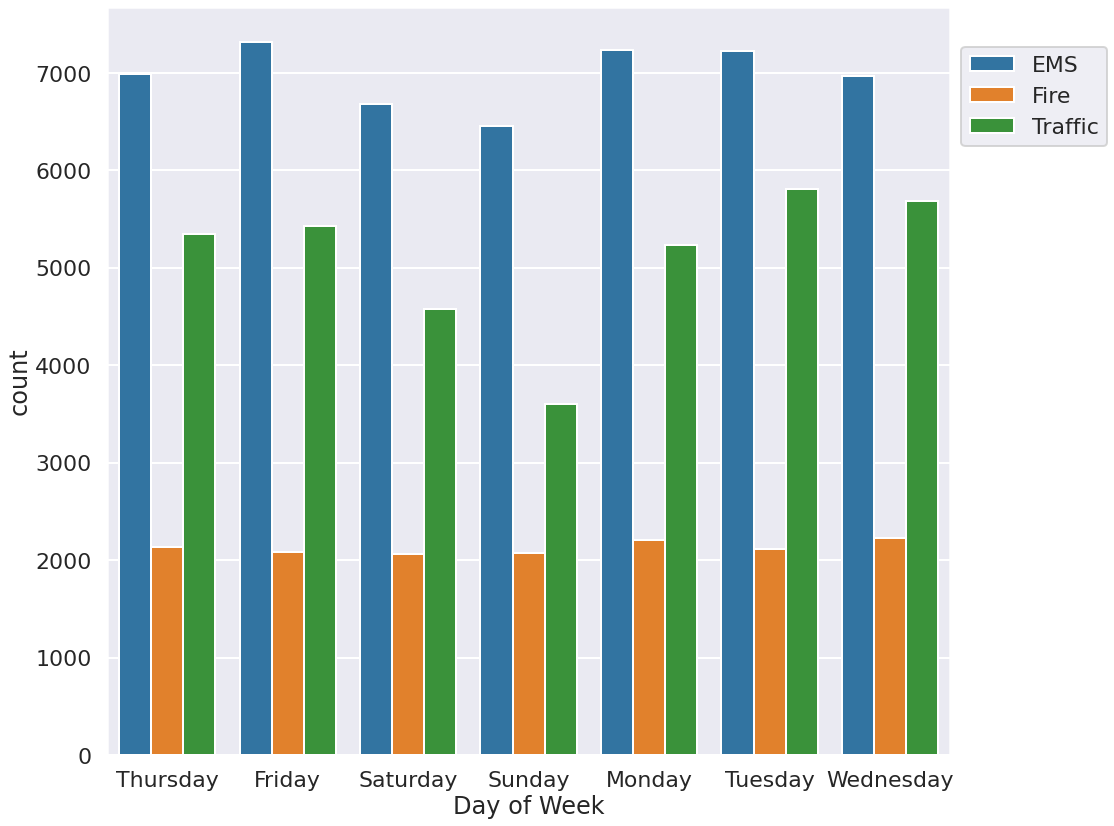

In [25]:
fig = plt.figure(figsize=(16,12))
sns.countplot(x='Day of Week', data=df, hue='Reason')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.88))
plt.tight_layout()
plt.show()

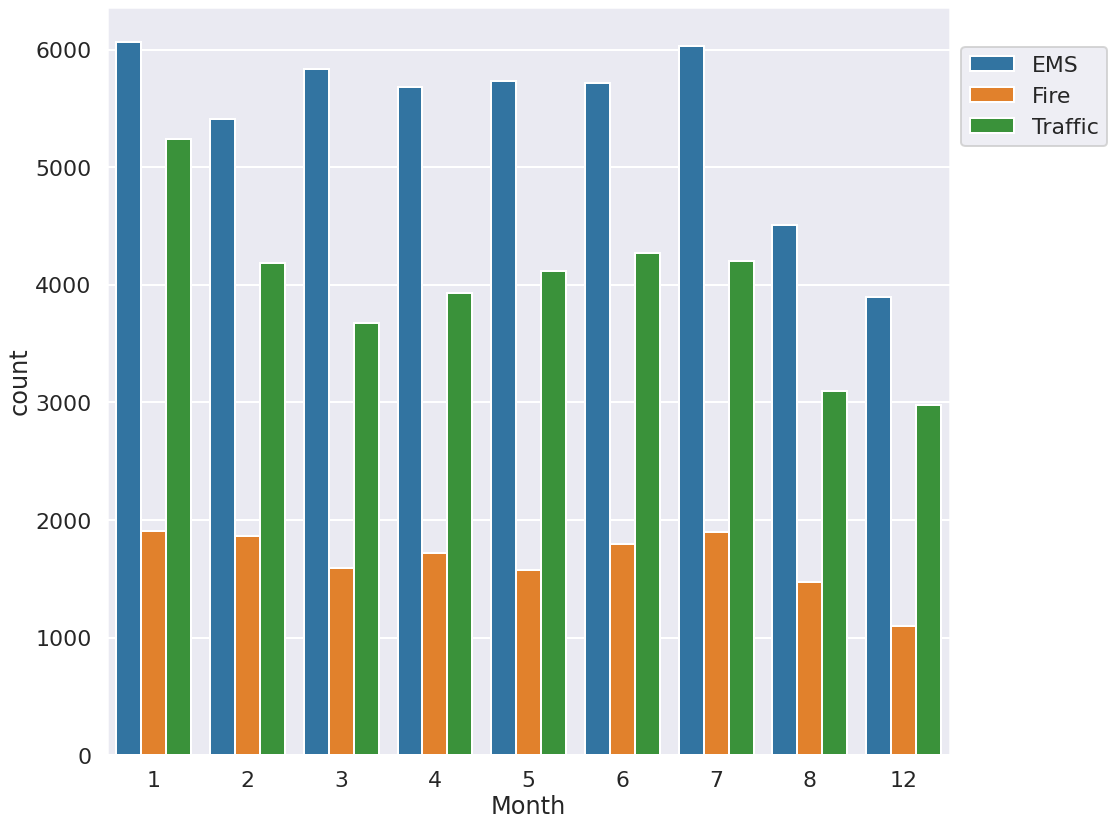

In [26]:
fig = plt.figure(figsize=(16,12))
sns.countplot(x='Month', data=df, hue='Reason')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.88))
plt.tight_layout()
plt.show()

**Did you notice something strange about the Plot?**

_____

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [27]:
byMonth = df.groupby(by='Month')

In [28]:
byMonth.count().head()

lat    lng   desc    zip  title  timeStamp    twp   addr      e  \
Month                                                                      
1      13205  13205  13205  11527  13205      13205  13203  13096  13205   
2      11467  11467  11467   9930  11467      11467  11465  11396  11467   
3      11101  11101  11101   9755  11101      11101  11092  11059  11101   
4      11326  11326  11326   9895  11326      11326  11323  11283  11326   
5      11423  11423  11423   9946  11423      11423  11420  11378  11423   

       Reason   Hour  Day of Week  
Month                              
1       13205  13205        13205  
2       11467  11467        11467  
3       11101  11101        11101  
4       11326  11326        11326  
5       11423  11423        11423

In [29]:
byMonth.describe()['lat'].index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 12], dtype='int64', name='Month')

**Now create a simple plot off of the dataframe indicating the count of calls per month.**

In [30]:
fig = plt.figure(figsize=(16,12))
sns.lineplot(x=byMonth.describe()['lat'].index, y=byMonth.describe()['lat']['count'])
plt.ylabel("")
plt.tight_layout()
plt.show()

In [31]:
byMonth = df.groupby('Month').count()
byMonth.head()

lat    lng   desc    zip  title  timeStamp    twp   addr      e  \
Month                                                                      
1      13205  13205  13205  11527  13205      13205  13203  13096  13205   
2      11467  11467  11467   9930  11467      11467  11465  11396  11467   
3      11101  11101  11101   9755  11101      11101  11092  11059  11101   
4      11326  11326  11326   9895  11326      11326  11323  11283  11326   
5      11423  11423  11423   9946  11423      11423  11420  11378  11423   

       Reason   Hour  Day of Week  
Month                              
1       13205  13205        13205  
2       11467  11467        11467  
3       11101  11101        11101  
4       11326  11326        11326  
5       11423  11423        11423

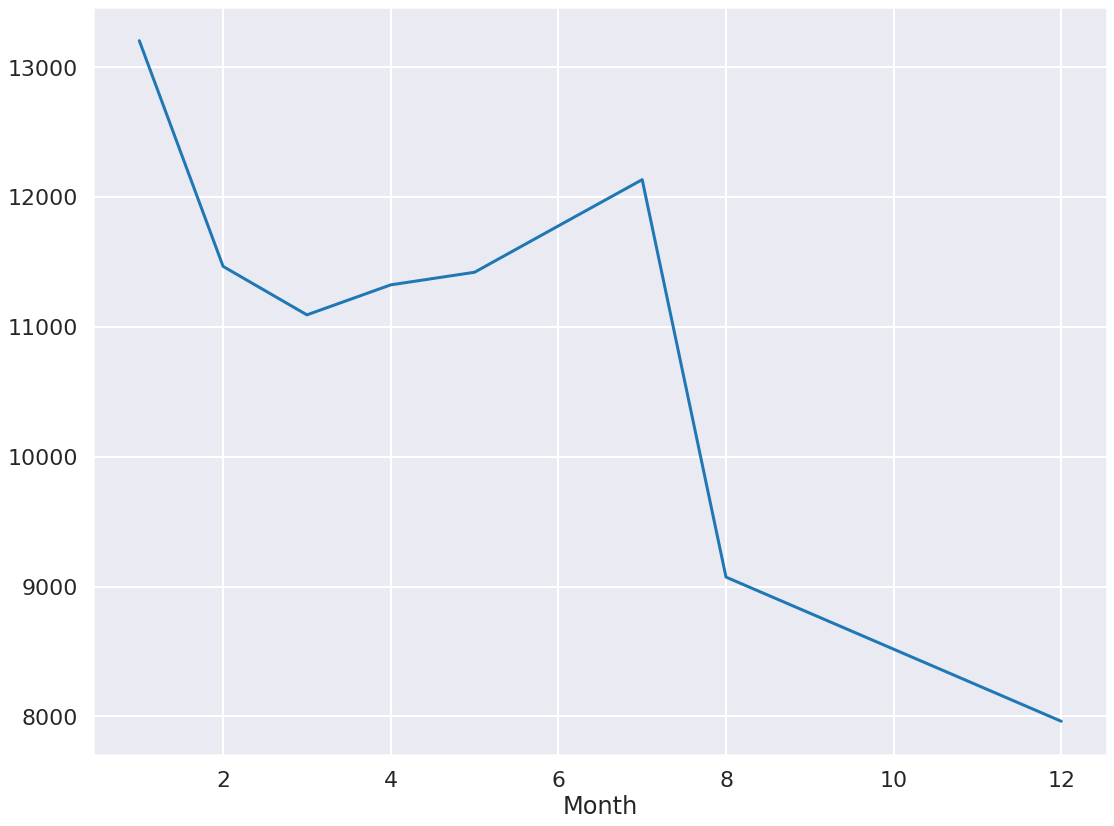

In [32]:
fig = plt.figure(figsize=(16,12))
byMonth['twp'].plot()
plt.tight_layout()
plt.show()

**Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column.**

In [33]:
byMonth.reset_index()

Month    lat    lng   desc    zip  title  timeStamp    twp   addr      e  \
0      1  13205  13205  13205  11527  13205      13205  13203  13096  13205   
1      2  11467  11467  11467   9930  11467      11467  11465  11396  11467   
2      3  11101  11101  11101   9755  11101      11101  11092  11059  11101   
3      4  11326  11326  11326   9895  11326      11326  11323  11283  11326   
4      5  11423  11423  11423   9946  11423      11423  11420  11378  11423   
5      6  11786  11786  11786  10212  11786      11786  11777  11732  11786   
6      7  12137  12137  12137  10633  12137      12137  12133  12088  12137   
7      8   9078   9078   9078   7832   9078       9078   9073   9025   9078   
8     12   7969   7969   7969   6907   7969       7969   7963   7916   7969   

   Reason   Hour  Day of Week  
0   13205  13205        13205  
1   11467  11467        11467  
2   11101  11101        11101  
3   11326  11326        11326  
4   11423  11423        11423  
5   11786  11786        11786  
6   12137  12137        12137  
7    9078   9078         9078  
8    7969   7969         7969

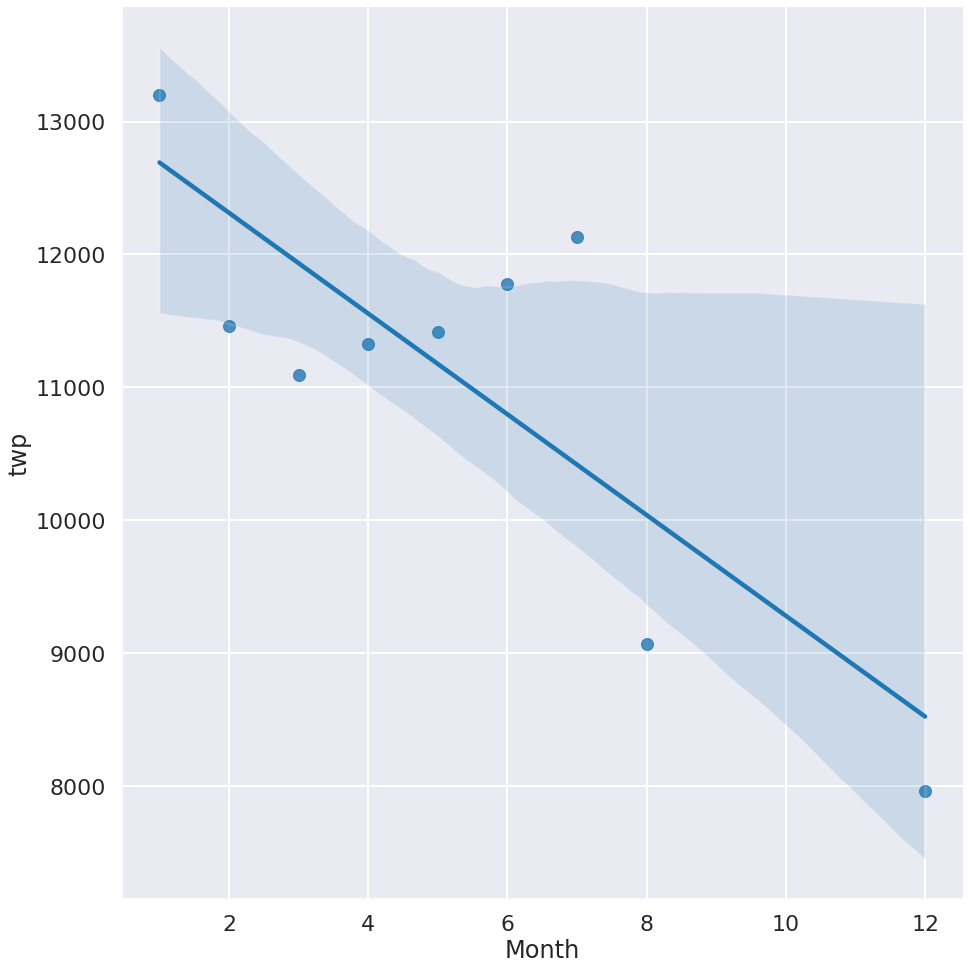

In [34]:
# fig = plt.figure(figsize=(16,12))
sns.lmplot(x='Month', y='twp', data=byMonth.reset_index(),height=14)
# plt.ylabel("")
plt.tight_layout()
plt.show()

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method.** 

In [35]:
df['date']  = df['timeStamp'].apply(lambda x:x.date())

In [36]:
df.head(2)

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   

       zip                    title           timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY 2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY 2015-12-10 17:40:00  HATFIELD TOWNSHIP   

                         addr  e Reason  Hour  Month Day of Week        date  
0      REINDEER CT & DEAD END  1    EMS    17     12    Thursday  2015-12-10  
1  BRIAR PATH & WHITEMARSH LN  1    EMS    17     12    Thursday  2015-12-10

**Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

In [37]:
byDate = df.groupby(by='date').count()
byDate.head()

lat  lng  desc  zip  title  timeStamp  twp  addr    e  Reason  \
date                                                                        
2015-12-10  115  115   115  100    115        115  115   113  115     115   
2015-12-11  396  396   396  333    396        396  395   391  396     396   
2015-12-12  403  403   403  333    403        403  403   401  403     403   
2015-12-13  319  319   319  280    319        319  319   317  319     319   
2015-12-14  447  447   447  387    447        447  446   445  447     447   

            Hour  Month  Day of Week  
date                                  
2015-12-10   115    115          115  
2015-12-11   396    396          396  
2015-12-12   403    403          403  
2015-12-13   319    319          319  
2015-12-14   447    447          447

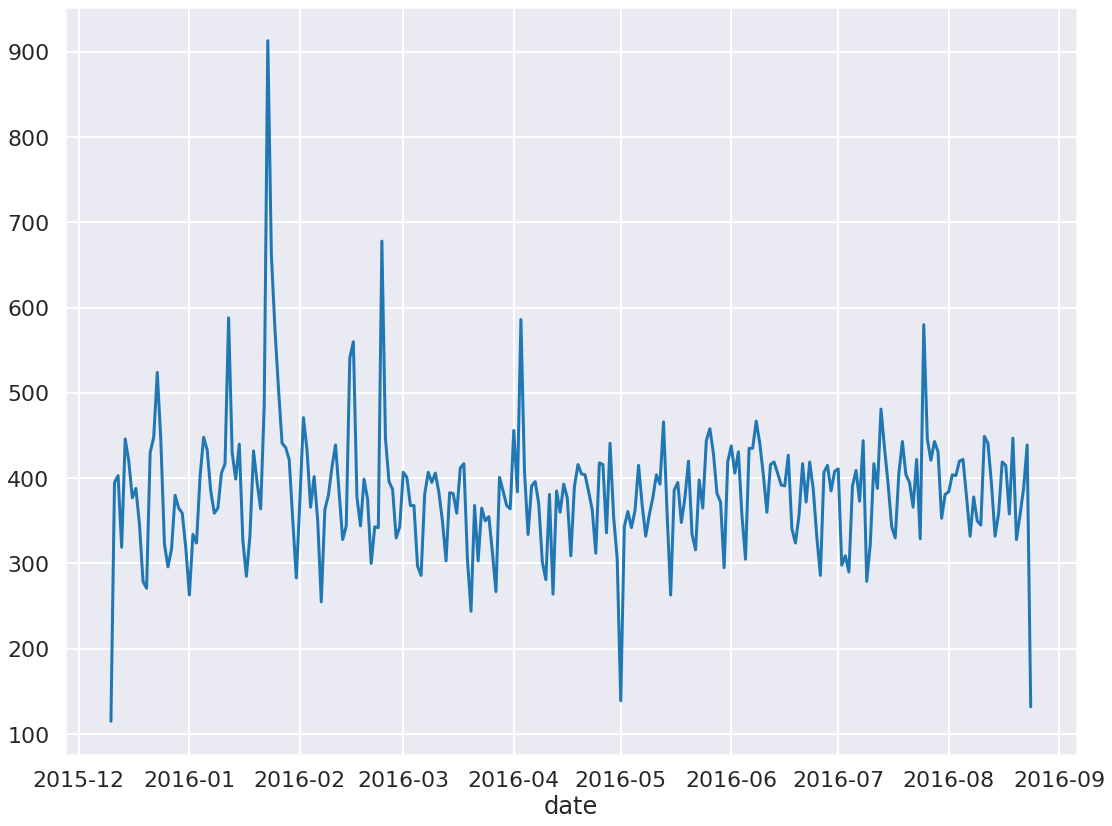

In [38]:
fig = plt.figure(figsize=(16,12))
byDate['twp'].plot()
plt.tight_layout()
plt.show()

**Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

In [39]:
byReason = df.groupby(by=['Reason','date']).count()
byReason.head()

lat  lng  desc  zip  title  timeStamp  twp  addr    e  \
Reason date                                                                
EMS    2015-12-10   57   57    57   52     57         57   57    57   57   
       2015-12-11  186  186   186  166    186        186  186   186  186   
       2015-12-12  189  189   189  171    189        189  189   189  189   
       2015-12-13  190  190   190  178    190        190  190   190  190   
       2015-12-14  222  222   222  201    222        222  222   222  222   

                   Hour  Month  Day of Week  
Reason date                                  
EMS    2015-12-10    57     57           57  
       2015-12-11   186    186          186  
       2015-12-12   189    189          189  
       2015-12-13   190    190          190  
       2015-12-14   222    222          222

In [40]:
byReason.xs('EMS',level='Reason').head()

lat  lng  desc  zip  title  timeStamp  twp  addr    e  Hour  \
date                                                                      
2015-12-10   57   57    57   52     57         57   57    57   57    57   
2015-12-11  186  186   186  166    186        186  186   186  186   186   
2015-12-12  189  189   189  171    189        189  189   189  189   189   
2015-12-13  190  190   190  178    190        190  190   190  190   190   
2015-12-14  222  222   222  201    222        222  222   222  222   222   

            Month  Day of Week  
date                            
2015-12-10     57           57  
2015-12-11    186          186  
2015-12-12    189          189  
2015-12-13    190          190  
2015-12-14    222          222

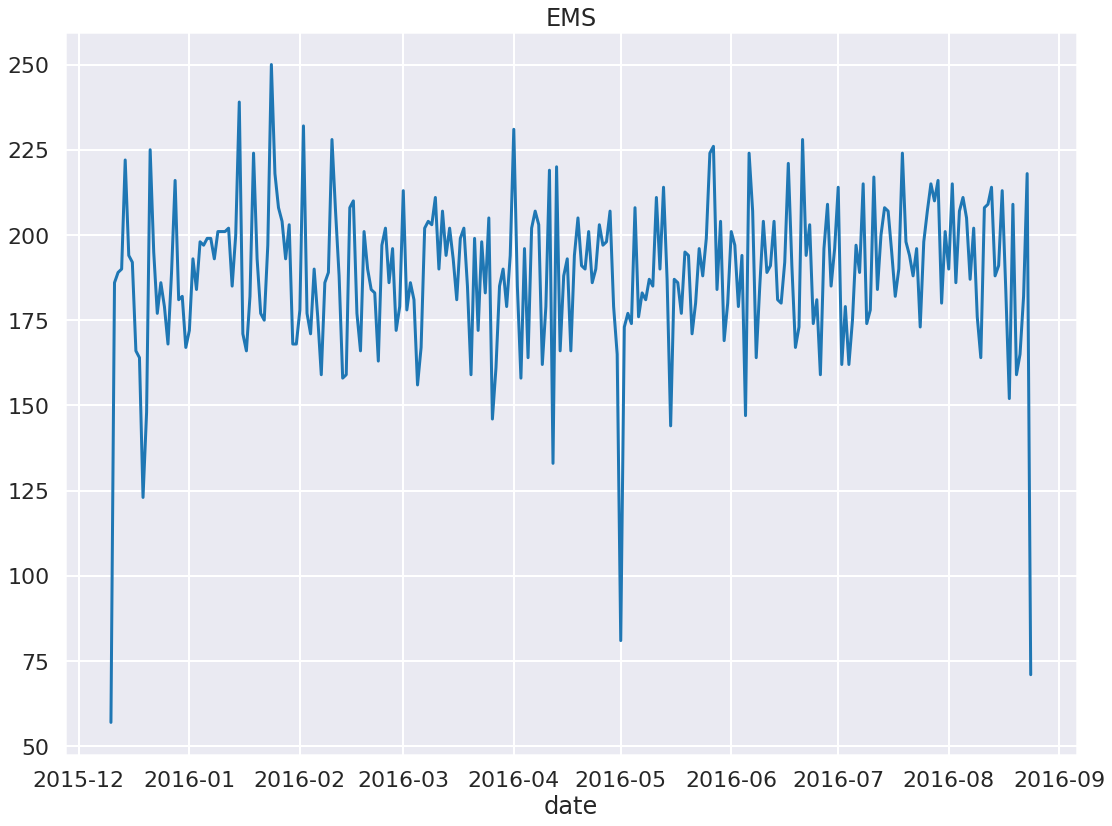

In [41]:
fig = plt.figure(figsize=(16,12))
byReason.xs('EMS',level='Reason')['twp'].plot()
plt.title('EMS')
plt.tight_layout()
plt.show()

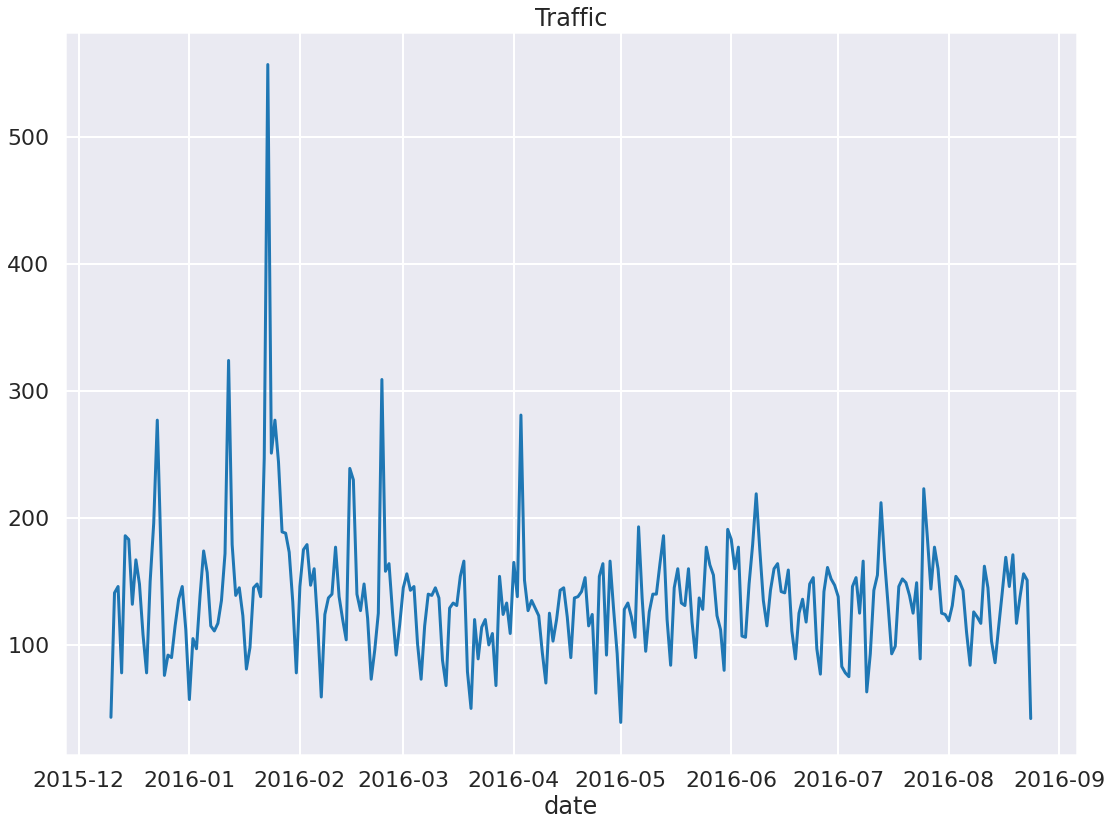

In [42]:
fig = plt.figure(figsize=(16,12))
byReason.xs('Traffic',level='Reason')['twp'].plot()
plt.title('Traffic')
plt.tight_layout()
plt.show()

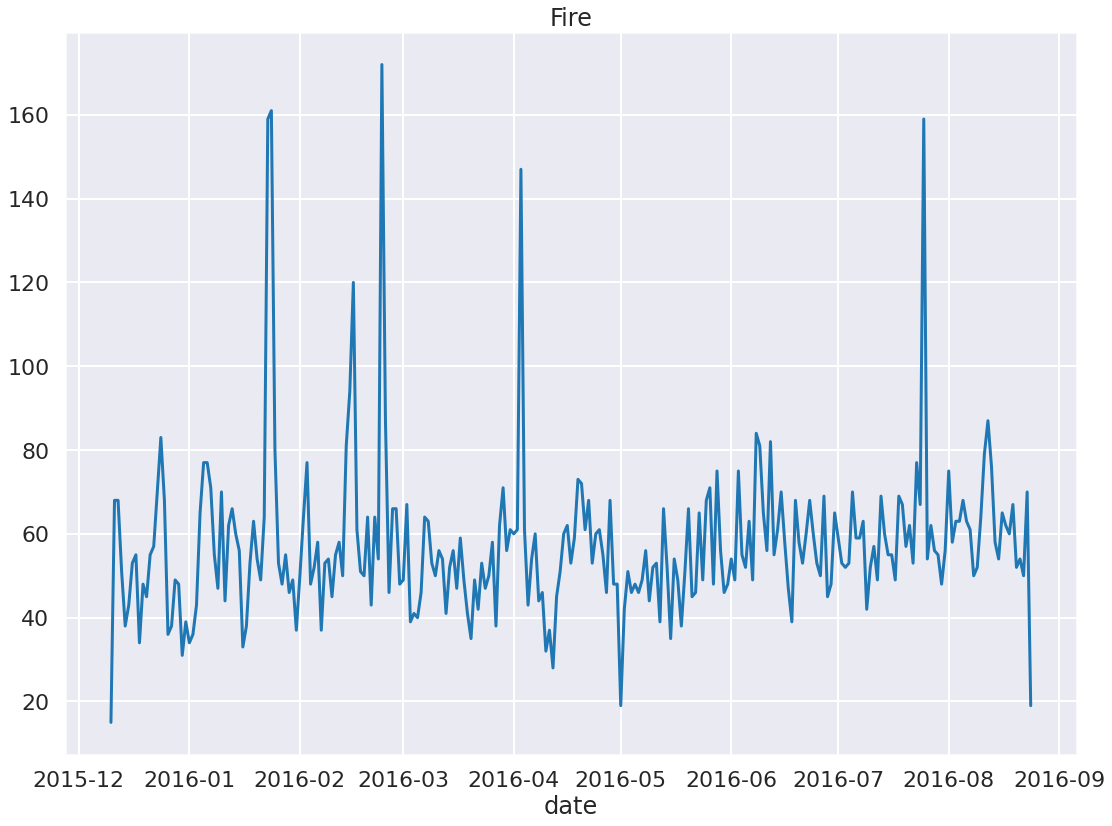

In [43]:
fig = plt.figure(figsize=(16,12))
byReason.xs('Fire',level='Reason')['twp'].plot()
plt.title('Fire')
plt.tight_layout()
plt.show()

____
**Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [47]:
df.head(2)

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   

       zip                    title           timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY 2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY 2015-12-10 17:40:00  HATFIELD TOWNSHIP   

                         addr  e Reason  Hour  Month Day of Week        date  
0      REINDEER CT & DEAD END  1    EMS    17     12    Thursday  2015-12-10  
1  BRIAR PATH & WHITEMARSH LN  1    EMS    17     12    Thursday  2015-12-10

In [51]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour          0    1    2    3    4    5    6    7    8    9   ...   14   15  \
Day of Week                                                    ...             
Friday       275  235  191  175  201  194  372  598  742  752  ...  932  980   
Monday       282  221  201  194  204  267  397  653  819  786  ...  869  913   
Saturday     375  301  263  260  224  231  257  391  459  640  ...  789  796   
Sunday       383  306  286  268  242  240  300  402  483  620  ...  684  691   
Thursday     278  202  233  159  182  203  362  570  777  828  ...  876  969   

Hour           16    17   18   19   20   21   22   23  
Day of Week                                            
Friday       1039   980  820  696  667  559  514  474  
Monday        989   997  885  746  613  497  472  325  
Saturday      848   757  778  696  628  572  506  467  
Sunday        663   714  670  655  537  461  415  330  
Thursday      935  1013  810  698  617  553  424  354  

[5 rows x 24 columns]

**Now create a HeatMap using this new DataFrame.**

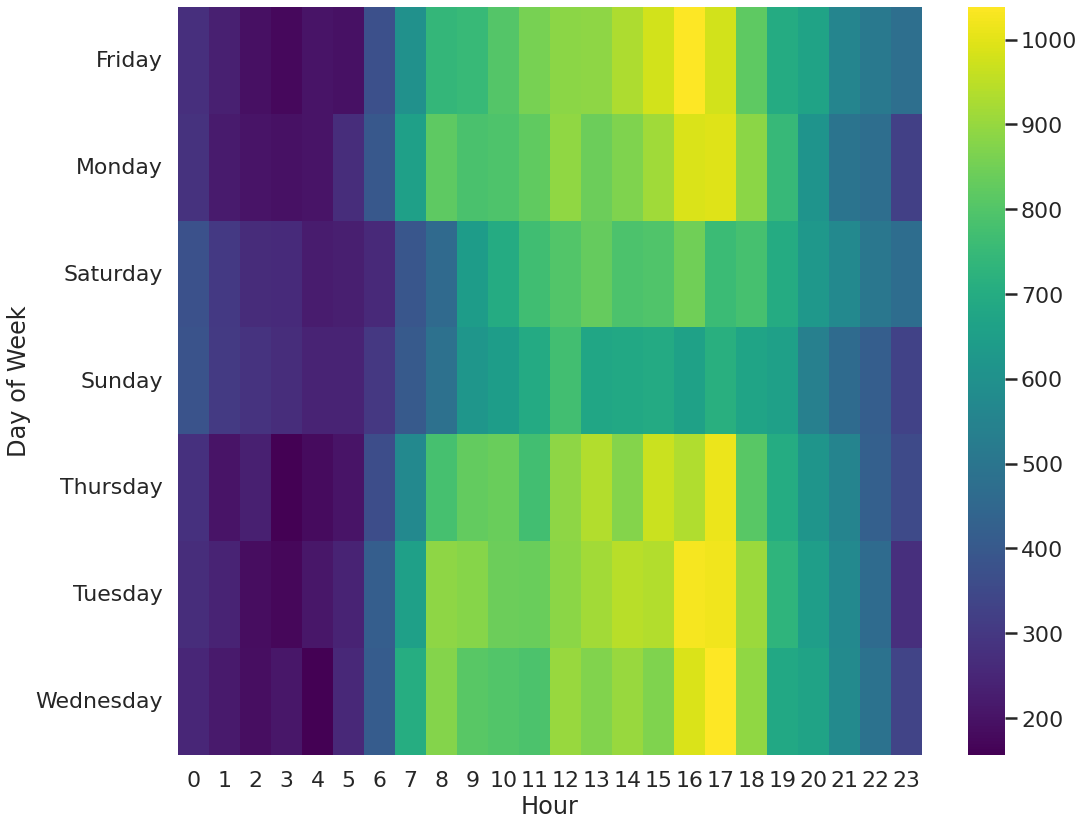

In [55]:
fig = plt.figure(figsize=(16,12))
sns.heatmap(dayHour, cmap='viridis')
plt.tight_layout()
plt.show()

**Now create a clustermap using this DataFrame.**

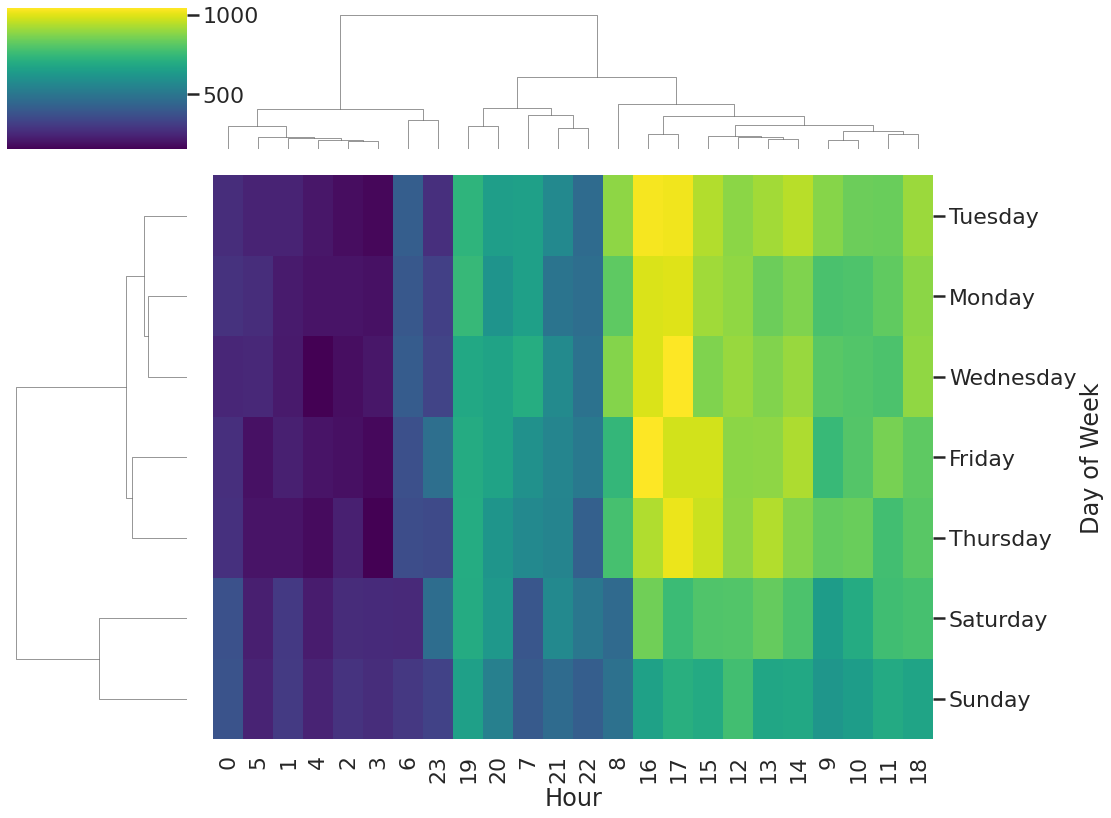

In [79]:
sns.clustermap(dayHour, cmap='viridis',figsize=(16, 12))
plt.tight_layout()
plt.show()

**Now repeat these same plots and operations, for a DataFrame that shows the Month as the column.**

In [65]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month          1     2     3     4     5     6     7     8     12
Day of Week                                                      
Friday       1970  1581  1525  1958  1730  1649  2045  1310  1065
Monday       1727  1964  1535  1598  1779  1617  1692  1511  1257
Saturday     2291  1441  1266  1734  1444  1388  1695  1099   978
Sunday       1960  1229  1102  1488  1424  1333  1672  1021   907
Thursday     1584  1596  1900  1601  1590  2065  1646  1230  1266

In [66]:
## Heat Map

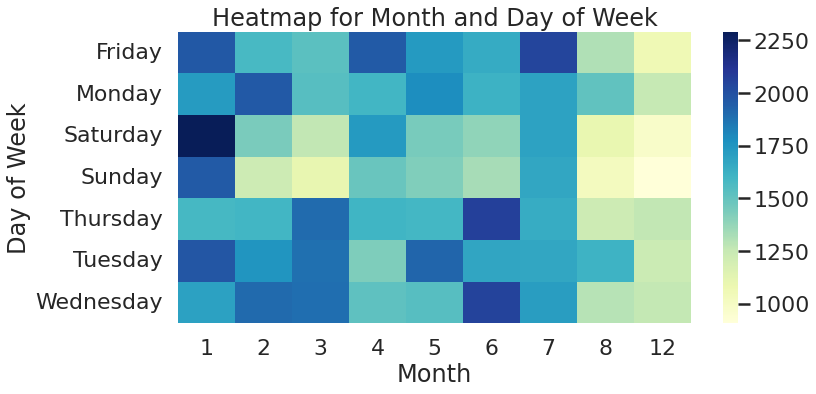

In [72]:
fig = plt.figure(figsize=(12,6))
sns.heatmap(dayMonth, cmap='YlGnBu')
plt.title('Heatmap for Month and Day of Week')
plt.tight_layout()
plt.show()

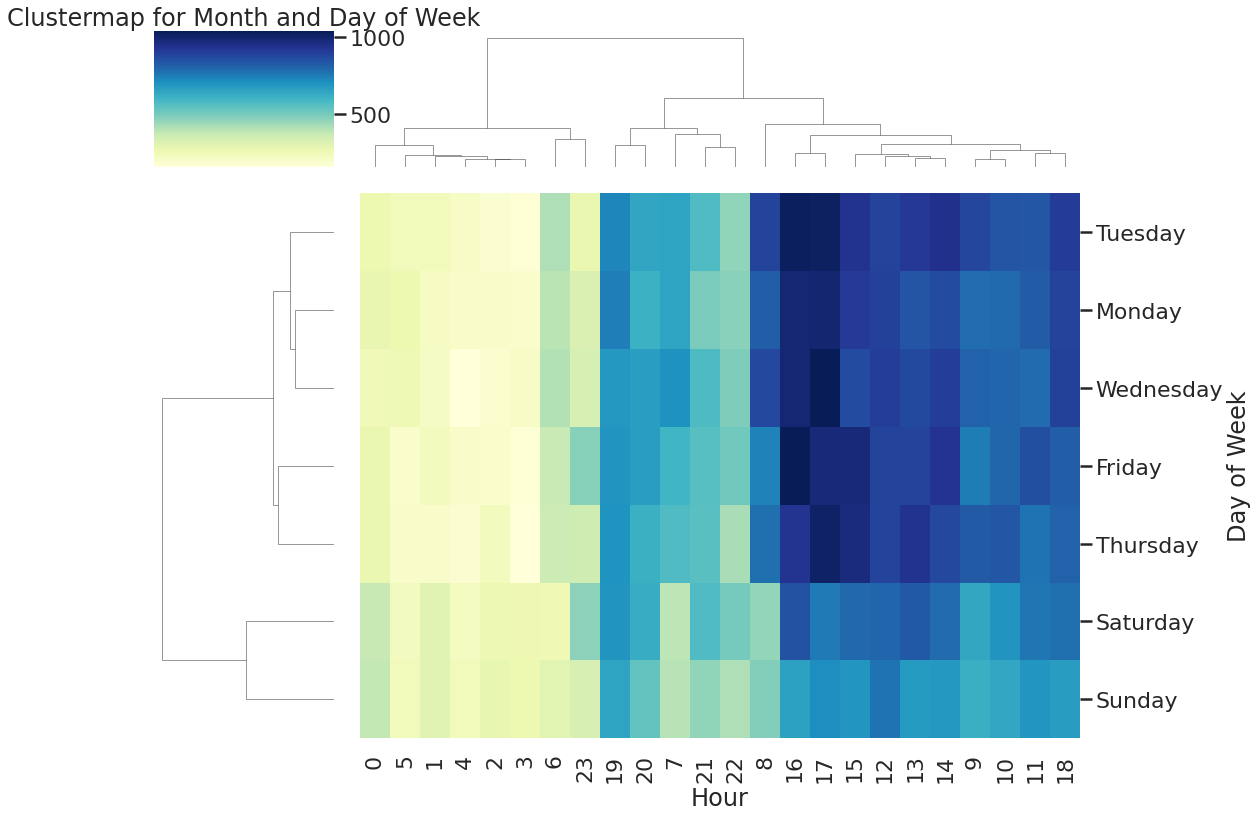

In [80]:
sns.clustermap(dayHour, cmap='YlGnBu',figsize=(16, 12))
plt.title('Clustermap for Month and Day of Week')
plt.tight_layout()
plt.show()